In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data

In [36]:
df = pd.read_csv('Iris Data PATH')

In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [40]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [41]:
df.isnull().sum().sum()

np.int64(0)

In [42]:
df.duplicated().sum()

np.int64(0)

##Plots

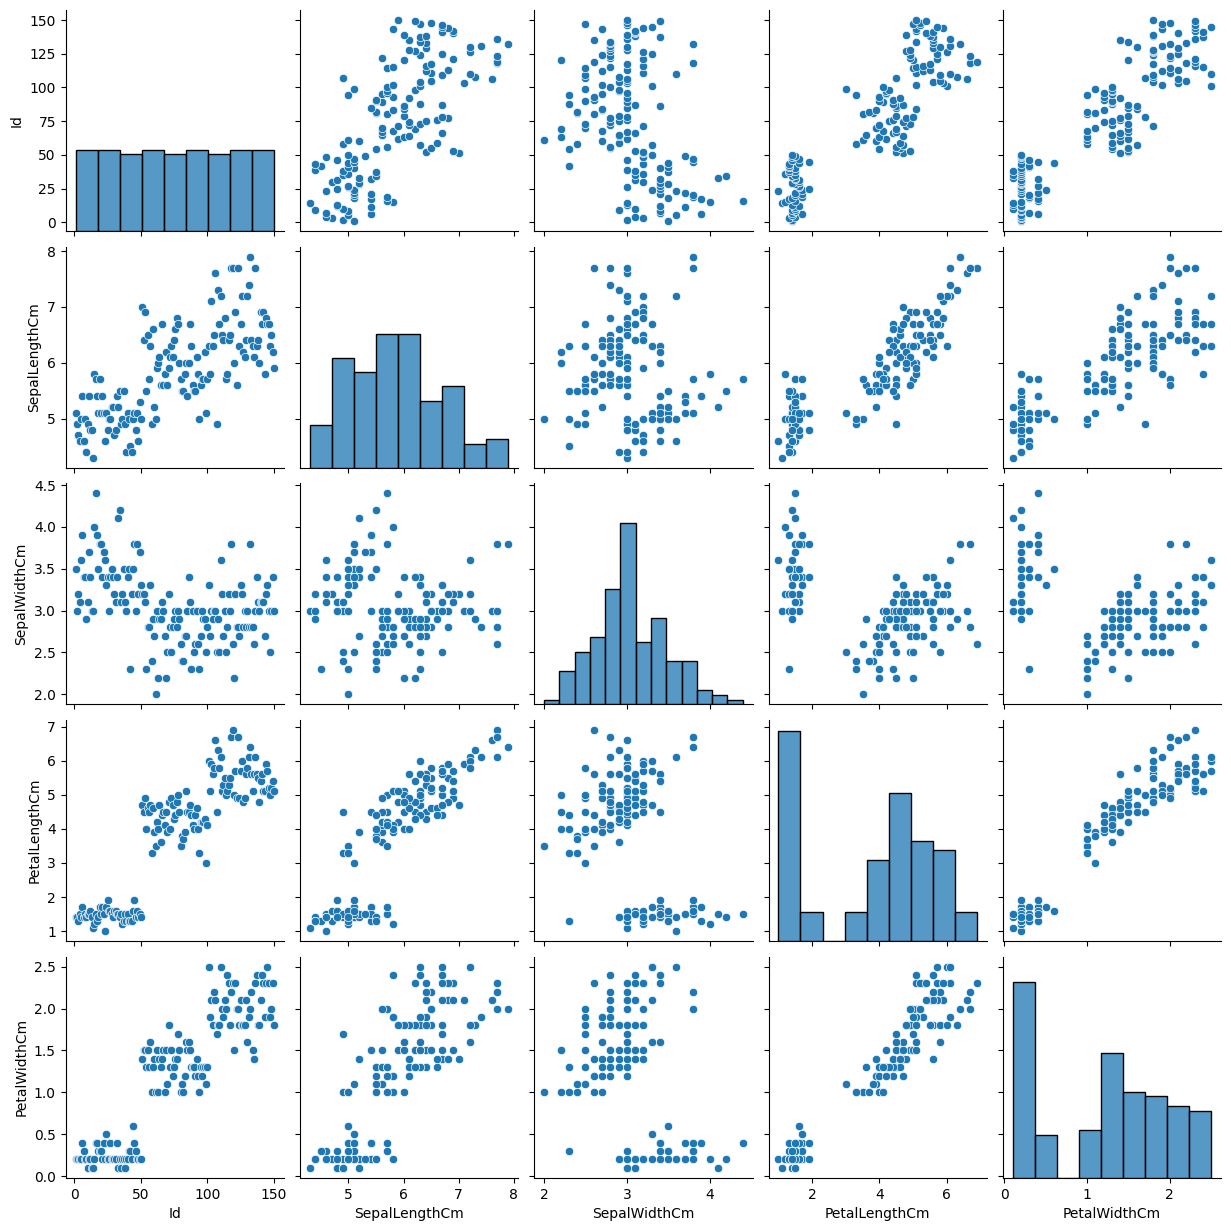

In [43]:
sns.pairplot(df)
plt.show()

###Scatter Plots

In [44]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

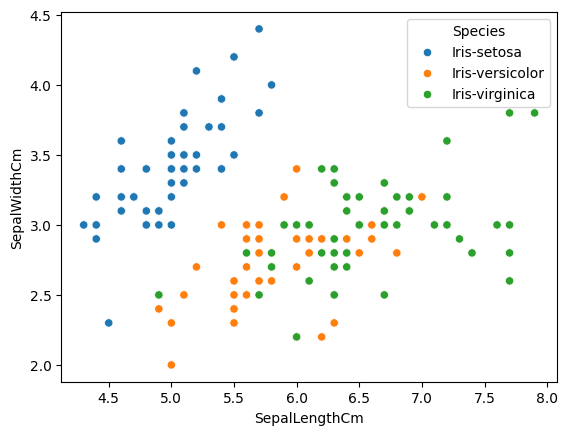

In [45]:
sns.scatterplot(x = df["SepalLengthCm"], y = df["SepalWidthCm"], hue = df["Species"])
plt.show()

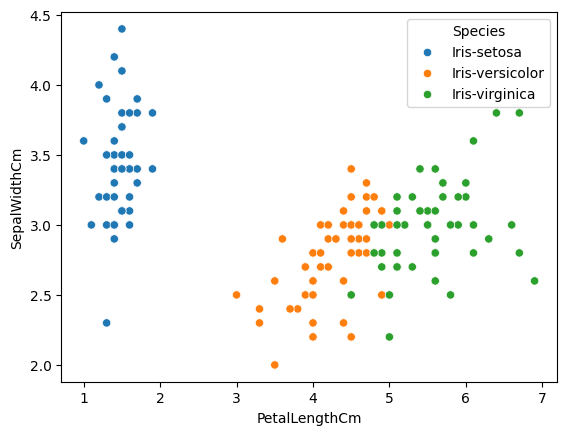

In [46]:
sns.scatterplot(x = df["PetalLengthCm"], y = df["SepalWidthCm"], hue = df["Species"])
plt.show()

###Box Plots

In [47]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

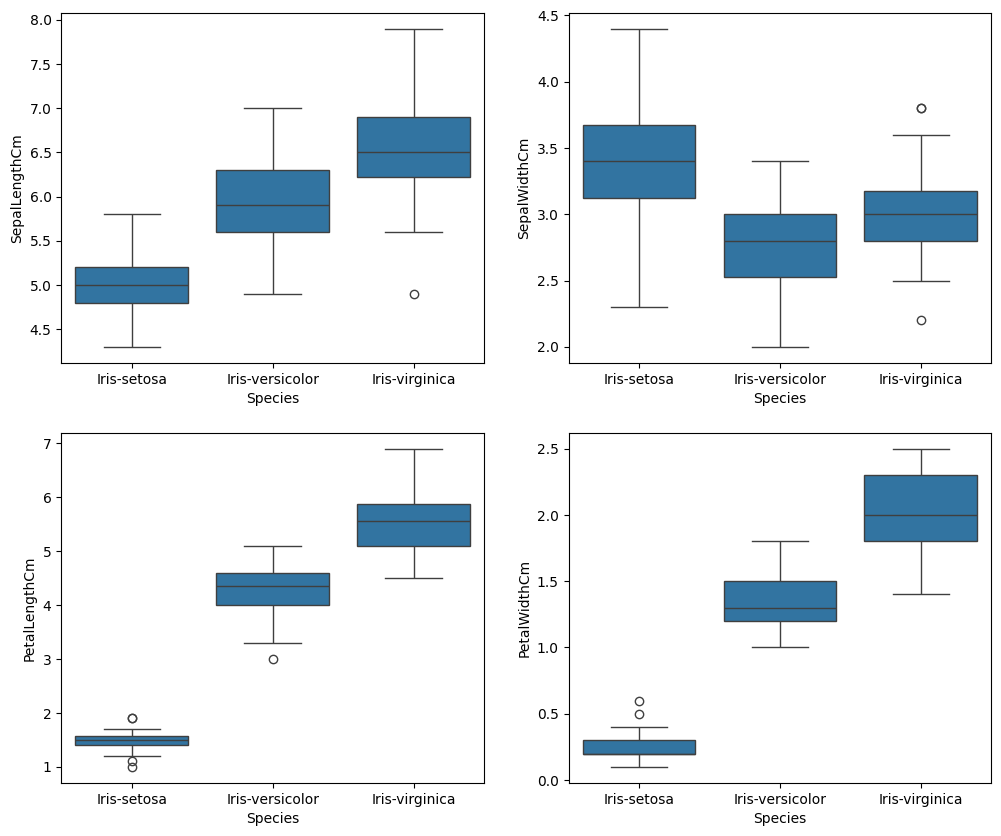

In [48]:
fig, axes = plt.subplots(2,2, figsize = (12,10))

sns.boxplot(x = df["Species"], y = df["SepalLengthCm"], ax = axes[0,0])
sns.boxplot(x = df["Species"], y = df["SepalWidthCm"], ax = axes[0,1])
sns.boxplot(x = df["Species"], y = df["PetalLengthCm"], ax = axes[1,0])
sns.boxplot(x = df["Species"], y = df["PetalWidthCm"], ax = axes[1,1])

plt.show()

###Correlation

In [52]:
from sklearn.preprocessing import LabelEncoder

In [50]:
df = df.drop("Id", axis = 1)

In [54]:
label_encoder = LabelEncoder() # Convert categorical 'Species' labels to numerical values to allow correlation calculation and model training.
df["Species"] = label_encoder.fit_transform(df["Species"])

In [55]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [58]:
corr_matrix = df.corr()

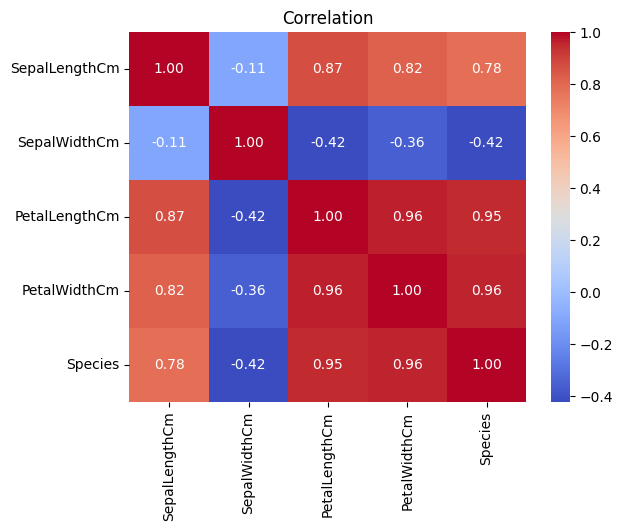

In [59]:
sns.heatmap(corr_matrix, annot= True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation")
plt.show()

- The heatmap reveals a very strong positive correlation between 'Species' and  'PetalWidthCm' (0.96) as well as 'PetalLengthCm' (0.95).
- This indicates that petal dimensions are the most decisive features for classification.
- 'SepalWidthCm' shows the weakest correlation (-0.42), suggesting it has less predictive power.

#Model

In [62]:
df["Species"].value_counts()

,count
Species,
0,50
1,50
2,50


In [63]:
X = df.drop("Species", axis = 1)
y = df["Species"]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###Baseline

In [75]:
log_reg = LogisticRegression()

In [76]:
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

In [78]:
print("Classification Report:", classification_report(y_test, y_pred_log))
print("Accuracy Score:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


###Tuned

In [79]:
#Since the accuracy score is 1.0 there is no need to hypertune this model

##SVM

In [81]:
from sklearn.svm import SVC

###Baseline

In [82]:
svc_baseline = SVC()

In [83]:
svc_baseline.fit(X_train_scaled, y_train)
y_pred_svc_baseline = svc_baseline.predict(X_test_scaled)

In [85]:
print("Classification Report:", classification_report(y_test, y_pred_svc_baseline))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc_baseline))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_svc_baseline))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [96]:
acc_svm_default = accuracy_score(y_test, y_pred_svc_baseline)
print(f"   -> Default SVM Accuracy: {acc_svm_default:.4f}")

   -> Default SVM Accuracy: 1.0000


In [ ]:
#Since the accuracy score is 1.0 there is no need to hypertune this model

##What if the score is not 1.0 and we want to improve?

In [88]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [89]:
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [90]:
best_svm_model = grid_svm.best_estimator_
y_pred_svm_tuned = best_svm_model.predict(X_test_scaled)
acc_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)

In [93]:
print(f"   -> Best Parameters: {grid_svm.best_params_}")
print(f"   -> Tuned SVM Accuracy: {acc_svm_tuned:.4f}")

   -> Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
   -> Tuned SVM Accuracy: 0.9667
